In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob 
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\geosh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\geosh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
DF = pd.read_excel(r'C:\Users\geosh\Documents\DATASETS AND PROJECTS\customertweets.xlsx')

In [3]:
print(DF)

         conversation_id          created_at  favorite_count  \
0    1620177650470748160 2023-01-30 16:50:27               7   
1    1620085175471177728 2023-01-30 10:43:00               9   
2    1620206323588800512 2023-01-30 18:44:24              12   
3    1618649320378482688 2023-01-26 11:37:25               7   
4    1616565369321275392 2023-01-20 17:36:33               5   
..                   ...                 ...             ...   
595  1618425433774755840 2023-01-26 09:11:46               0   
596  1618586104281632768 2023-01-26 09:10:30              10   
597  1618495483726671872 2023-01-26 09:06:19               1   
598  1618610690390102016 2023-01-26 09:03:55               0   
599  1618517673926856704 2023-01-26 02:54:18               0   

                                             full_text       hashtags/0  \
0    Join experts to learn more about Kerendia (fin...              NaN   
1    Have a new/exciting idea in #UrbanTechnology? ...  UrbanTechnology   
2    T

In [4]:
#ANALISIS EXPLORATORIO
DF.count()

conversation_id                 600
created_at                      600
favorite_count                  600
full_text                       600
hashtags/0                       86
                               ... 
user_mentions/17/screen_name      9
user_mentions/18/id_str           1
user_mentions/18/name             1
user_mentions/18/screen_name      1
view_count                      600
Length: 155, dtype: int64

In [5]:
DF.index

RangeIndex(start=0, stop=600, step=1)

In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 155 entries, conversation_id to view_count
dtypes: bool(13), datetime64[ns](2), float64(33), int64(16), object(91)
memory usage: 673.4+ KB


In [7]:
CustomerTweets = pd.DataFrame(DF)

In [8]:
list(CustomerTweets.columns.values)

['conversation_id',
 'created_at',
 'favorite_count',
 'full_text',
 'hashtags/0',
 'hashtags/1',
 'hashtags/2',
 'hashtags/3',
 'hashtags/4',
 'hashtags/5',
 'hashtags/6',
 'hashtags/7',
 'hashtags/8',
 'hashtags/9',
 'hashtags/10',
 'hashtags/11',
 'hashtags/12',
 'hashtags/13',
 'hashtags/14',
 'hashtags/15',
 'hashtags/16',
 'hashtags/17',
 'hashtags/18',
 'hashtags/19',
 'hashtags/20',
 'id',
 'media/0/media_url',
 'media/0/type',
 'media/1/media_url',
 'media/1/type',
 'media/2/media_url',
 'media/2/type',
 'media/3/media_url',
 'media/3/type',
 'reply_count',
 'retweet_count',
 'startUrl',
 'url',
 'urls/0/display_url',
 'urls/0/expanded_url',
 'urls/0/url',
 'user/advertiser_account_type',
 'user/blocked_by',
 'user/blocking',
 'user/business_profile_state',
 'user/can_dm',
 'user/contributors_enabled',
 'user/created_at',
 'user/default_profile_image',
 'user/description',
 'user/ext_has_nft_avatar',
 'user/ext_is_blue_verified',
 'user/ext_verified_type',
 'user/fast_follower

In [9]:
#Creando filtro para eliminar los tweets de un user en especifico 
filtrouser = CustomerTweets['user/name'] == 'Copa Airlines'

In [10]:
#para que nos devuelva todo menos el filtro anterior 
CustomerTweets= CustomerTweets['created_at'],CustomerTweets['full_text'].loc[-filtrouser]

In [11]:
#creamos un dataframe porque solo queremos analizar los tweets
CustomerTweetsOnly = pd.DataFrame(CustomerTweets)

In [12]:
CustomerTweetsOnly


,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
created_at,1675097427000000000,1675075380000000000,1675104264000000000,1674733045000000000,1674236193000000000,1675164443000000000,1674515413000000000,1.674500e+18,1.675192e+18,1675190904000000000,...,1674727245000000000,1674726534000000000,1674726082000000000,1.674726e+18,1674724316000000000,1.674724e+18,1674724230000000000,1674723979000000000,1674723835000000000,1674701658000000000
full_text,Join experts to learn more about Kerendia (fin...,Have a new/exciting idea in #UrbanTechnology? ...,The middle class held an average of 7.4% of al...,Get involved today | Find My Chapter,How can we support students' emotional and men...,Feria Internacional de David @FeriaDeDavid del...,"Aunque las partes negocian, los 1,200 pilotos ...",NaN,NaN,"@lagatanene Al más allá y al mismísimo Hades, ...",...,@CopaAirlines please settle with the pilots. T...,Muy buena la alternativa de @CopaAirlines de c...,@OriOrtiz @iamdoomling @CopaAirlines Queeee qu...,NaN,@CopaAirlines Seguimos varados en Fort Lauderd...,NaN,@DavidRamirezPO @CopaAirlines @LassoGuillermo ...,@CopaAirlines @FenixColor Por favor estoy preo...,@CopaAirlines hols que psssra con ls huelhs xe...,Hola amigos de @CopaAirlines tengo un viaje ma...


In [13]:
#cAMBIAR ORIENTACION
CustomerTweetsOnly = CustomerTweetsOnly.T

In [14]:
CustomerTweetsOnly

,created_at,full_text
0,1675097427000000000,Join experts to learn more about Kerendia (fin...
1,1675075380000000000,Have a new/exciting idea in #UrbanTechnology? ...
2,1675104264000000000,The middle class held an average of 7.4% of al...
3,1674733045000000000,Get involved today | Find My Chapter
4,1674236193000000000,How can we support students' emotional and men...
...,...,...
595,1674724306000000000.0,NaN
596,1674724230000000000,@DavidRamirezPO @CopaAirlines @LassoGuillermo ...
597,1674723979000000000,@CopaAirlines @FenixColor Por favor estoy preo...
598,1674723835000000000,@CopaAirlines hols que psssra con ls huelhs xe...


In [15]:
CustomerTweetsOnly = CustomerTweetsOnly.rename(columns={'full_text': 'TWEETS'})

In [16]:
CustomerTweetsOnly

,created_at,TWEETS
0,1675097427000000000,Join experts to learn more about Kerendia (fin...
1,1675075380000000000,Have a new/exciting idea in #UrbanTechnology? ...
2,1675104264000000000,The middle class held an average of 7.4% of al...
3,1674733045000000000,Get involved today | Find My Chapter
4,1674236193000000000,How can we support students' emotional and men...
...,...,...
595,1674724306000000000.0,NaN
596,1674724230000000000,@DavidRamirezPO @CopaAirlines @LassoGuillermo ...
597,1674723979000000000,@CopaAirlines @FenixColor Por favor estoy preo...
598,1674723835000000000,@CopaAirlines hols que psssra con ls huelhs xe...


In [17]:

TWEETLIST = CustomerTweetsOnly.values.tolist()

In [18]:
CustomerTweetsOnly = CustomerTweetsOnly.dropna()

In [19]:
CustomerTweetsOnly.convert_dtypes(convert_string=True)

,created_at,TWEETS
0,1675097427000000000,Join experts to learn more about Kerendia (fin...
1,1675075380000000000,Have a new/exciting idea in #UrbanTechnology? ...
2,1675104264000000000,The middle class held an average of 7.4% of al...
3,1674733045000000000,Get involved today | Find My Chapter
4,1674236193000000000,How can we support students' emotional and men...
...,...,...
594,1674724316000000000,@CopaAirlines Seguimos varados en Fort Lauderd...
596,1674724230000000000,@DavidRamirezPO @CopaAirlines @LassoGuillermo ...
597,1674723979000000000,@CopaAirlines @FenixColor Por favor estoy preo...
598,1674723835000000000,@CopaAirlines hols que psssra con ls huelhs xe...


In [20]:
CONVERTSTR = CustomerTweetsOnly['TWEETS'].astype(str)

In [21]:
#CONVERTIR TODO EN MINUSCALA Y A DATAFRAME 
CustomerTweetsOnly =  pd.DataFrame(CustomerTweetsOnly['TWEETS'].str.lower())


In [22]:
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords


In [23]:
import sys
sys.setrecursionlimit(3500)

In [24]:
#removing punctuation
CLEANEDTWEETS = pd.DataFrame(CustomerTweetsOnly['TWEETS'].str.replace(r'[^\w\s]+', ''))
CLEANEDTWEETS

C:\Users\geosh\AppData\Local\Temp\ipykernel_10040\947062185.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  CLEANEDTWEETS = pd.DataFrame(CustomerTweetsOnly['TWEETS'].str.replace(r'[^\w\s]+', ''))


,TWEETS
0,join experts to learn more about kerendia fine...
1,have a newexciting idea in urbantechnology see...
2,the middle class held an average of 74 of all ...
3,get involved today find my chapter
4,how can we support students emotional and ment...
...,...
594,copaairlines seguimos varados en fort lauderda...
596,davidramirezpo copaairlines lassoguillermo dar...
597,copaairlines fenixcolor por favor estoy preocu...
598,copaairlines hols que psssra con ls huelhs xe ...


In [25]:
#tokenized 
#tokenizzar
CLEANEDTWEETS['TOKENIZED'] = CLEANEDTWEETS.apply(lambda row: nltk.word_tokenize(row['TWEETS']), axis=1)
CLEANEDTWEETS

,TWEETS,TOKENIZED
0,join experts to learn more about kerendia fine...,"[join, experts, to, learn, more, about, kerend..."
1,have a newexciting idea in urbantechnology see...,"[have, a, newexciting, idea, in, urbantechnolo..."
2,the middle class held an average of 74 of all ...,"[the, middle, class, held, an, average, of, 74..."
3,get involved today find my chapter,"[get, involved, today, find, my, chapter]"
4,how can we support students emotional and ment...,"[how, can, we, support, students, emotional, a..."
...,...,...
594,copaairlines seguimos varados en fort lauderda...,"[copaairlines, seguimos, varados, en, fort, la..."
596,davidramirezpo copaairlines lassoguillermo dar...,"[davidramirezpo, copaairlines, lassoguillermo,..."
597,copaairlines fenixcolor por favor estoy preocu...,"[copaairlines, fenixcolor, por, favor, estoy, ..."
598,copaairlines hols que psssra con ls huelhs xe ...,"[copaairlines, hols, que, psssra, con, ls, hue..."


In [26]:
import nltk
from nltk.corpus import stopwords

stopsesp = stopwords.words('spanish')
stopseng = stopwords.words('english')
#unir 2 listas
stopsesp.extend(stopseng) 


In [27]:
#DEFINIR FUNCION PARA BORRAR STOPWORDS EN INGLES  Y ESPAÑOL 


def removestopwordsESP(text):
    t = [token for token in text if token.lower() not in stopsesp]
    text = ' '.join(t)    
    return text

In [28]:
CLEANEDTWEETS['Reviews_wo_Stop_WordsESP'] = CLEANEDTWEETS['TOKENIZED'].apply(removestopwordsESP)

In [29]:
CLEANEDDATA = pd.DataFrame(CLEANEDTWEETS['Reviews_wo_Stop_WordsESP'])

In [30]:
CLEANEDDATA = CLEANEDDATA.rename(columns={'Reviews_wo_Stop_WordsESP': 'DATA'})
CLEANEDDATA

,DATA
0,join experts learn kerendia finerenone treatme...
1,newexciting idea urbantechnology seeking exper...
2,middle class held average 74 wealth first thre...
3,get involved today find chapter
4,support students emotional mental wellness new...
...,...
594,copaairlines seguimos varados fort lauderdale ...
596,davidramirezpo copaairlines lassoguillermo dar...
597,copaairlines fenixcolor favor preocupada lshue...
598,copaairlines hols psssra ls huelhs xe pilotos ...


# SENTIMENT ANALYSIS 

In [31]:
# Convert only the tweets into a list

tweet_list = CLEANEDDATA['DATA'].to_list()

In [32]:
len(tweet_list)

532

In [33]:
DATA1 = TextBlob(tweet_list[443])
DATA1.sentiment

Sentiment(polarity=-0.21250000000000002, subjectivity=0.2875)

In [60]:
tweet_list[2]

'middle class held average 74 wealth first three quarters 2022 understand trends impact economy population environment 2023'

In [35]:
#PASOS A CONTINUAR 
#IDEAR MANERA DE VER EL SENTIMIENTO DE CADA FILA DE LA LISTA
#ver de que se quejan mas utilizando cantidad de palabras

In [36]:
#LISTA DE POLARIDAD 
def getPolarity(x):
     return TextBlob(x).sentiment.polarity

polaridad = list(map(getPolarity, tweet_list))

print(polaridad)

[0.0, 0.1, 0.03333333333333333, 0.0, -0.01060606060606061, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.55, 0.375, 0.04545454545454545, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.6666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02777777777777778, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.6666666666666666, 0.0, -0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4375, 0.09333333333333335, 0.0, 0.0, -0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.2, 0.25, 0.0, 0.07500000000000001, 0.5, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2333333333333333, 0.0, 0.0, 0.375, 0.0, 0.0, 0.0, -0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, -0.05, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.0, 0.0,

In [37]:
def getSubjectivity(x):
    return TextBlob(x).sentiment.subjectivity

subjetividad = list(map(getSubjectivity, tweet_list))

print(subjetividad)

[0.0, 0.4, 0.24444444444444444, 0.0, 0.37020202020202025, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.55, 0.5, 0.15151515151515152, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18888888888888888, 0.875, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1611111111111111, 0.0, 1.0, 0.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.9, 0.0, 0.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6875, 0.6733333333333333, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.4944444444444444, 0.0, 0.0, 0.0, 0.55, 0.3333333333333333, 0.0, 0.07500000000000001, 0.625, 0.16666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3666666666666667, 0.0, 0.0, 0.5, 0.1, 0.0, 0.0, 0.375, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.45, 0.0, 0.0, 0.0, 0.6499999999999999, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0

In [38]:
#NEW DATA FRAME WITH NEW LISTS

TWEETSANALISIS = pd.DataFrame(subjetividad, polaridad)

In [39]:
TWEETSANALISIS['TWEETS'] = tweet_list

In [43]:
TWEETSANALISIS.shape

(532, 2)

In [48]:
#continuar con nombre agregar indice 
TWEETSANALISIS['INDEX']=np.arange(len(TWEETSANALISIS))
TWEETSANALISIS.set_index('INDEX', inplace=True)
TWEETSANALISIS
#renombrar columnas 
#que significan los numeros
TWEETSANALISIS['subjetividad'],['polaridad'] = subjetividad, polaridad

,0,TWEETS
INDEX,,
0,0.000000,join experts learn kerendia finerenone treatme...
1,0.400000,newexciting idea urbantechnology seeking exper...
2,0.244444,middle class held average 74 wealth first thre...
3,0.000000,get involved today find chapter
4,0.370202,support students emotional mental wellness new...
...,...,...
527,0.000000,copaairlines seguimos varados fort lauderdale ...
528,0.000000,davidramirezpo copaairlines lassoguillermo dar...
529,0.000000,copaairlines fenixcolor favor preocupada lshue...


In [50]:
TWEETSANALISIS['subjetividad']= subjetividad
TWEETSANALISIS

,0,TWEETS,subjetividad
INDEX,,,
0,0.000000,join experts learn kerendia finerenone treatme...,0.000000
1,0.400000,newexciting idea urbantechnology seeking exper...,0.400000
2,0.244444,middle class held average 74 wealth first thre...,0.244444
3,0.000000,get involved today find chapter,0.000000
4,0.370202,support students emotional mental wellness new...,0.370202
...,...,...,...
527,0.000000,copaairlines seguimos varados fort lauderdale ...,0.000000
528,0.000000,davidramirezpo copaairlines lassoguillermo dar...,0.000000
529,0.000000,copaairlines fenixcolor favor preocupada lshue...,0.000000


In [51]:
TWEETSANALISIS['polaridad']= polaridad
TWEETSANALISIS

,0,TWEETS,subjetividad,polaridad
INDEX,,,,
0,0.000000,join experts learn kerendia finerenone treatme...,0.000000,0.000000
1,0.400000,newexciting idea urbantechnology seeking exper...,0.400000,0.100000
2,0.244444,middle class held average 74 wealth first thre...,0.244444,0.033333
3,0.000000,get involved today find chapter,0.000000,0.000000
4,0.370202,support students emotional mental wellness new...,0.370202,-0.010606
...,...,...,...,...
527,0.000000,copaairlines seguimos varados fort lauderdale ...,0.000000,0.000000
528,0.000000,davidramirezpo copaairlines lassoguillermo dar...,0.000000,0.000000
529,0.000000,copaairlines fenixcolor favor preocupada lshue...,0.000000,0.000000


In [56]:
TWEETSANALISIS.drop([0], axis=1, inplace=True)


In [66]:
##EL RESULTADO DEL ANALISIS SOBRE SUBJETIVIDAD EN ESTE CASO NO ES CONCLUYENTE, YA QUE EL RESULTADO DE LA MAYORIA DE LOS TWEETS 
#EN POLARIDAD ES IGUAL A 0
TWEETSANALISIS.tail(50)

,TWEETS,subjetividad,polaridad
INDEX,,,
482,dariovherrera copaairlines pedroheilbron lasso...,0.000000,0.000000
483,panamá itf seguimos preocupación conflicto rec...,0.000000,0.000000
484,manabí abre cielos mundo nueva ruta aérea mant...,0.000000,0.000000
485,buenas noticias continúana partir 27 junio man...,0.000000,0.000000
486,conectar américa latina resto mundo copaairlin...,0.000000,0.000000
487,inbox copaairlines going start operating direc...,0.350000,0.183333
488,dariovherrera copaairlines pedroheilbron lasso...,0.000000,0.000000
489,fortalecemos conectividad aérea internacional ...,0.000000,0.000000
490,dariovherrera copaairlines pedroheilbron lasso...,0.000000,0.000000


In [81]:
from collections import Counter
Counter(" ".join(TWEETSANALISIS['TWEETS']).split()).most_common(100)
#EN ESTE LISTADO PODEMOS DEDUCIR QUE MUCHOS DE LOS COMENTARIOS SON ACERCA DEL SERVICIO O DE RECLAMO DE EQUIPAJE

[('copaairlines', 534),
 ('lassoguillermo', 85),
 ('dariovherrera', 79),
 ('nielsolsenp', 77),
 ('manta', 68),
 ('copa', 66),
 ('panamá', 58),
 ('pedroheilbron', 52),
 ('obraspublicasec', 52),
 ('turismoec', 51),
 ('manavisionec', 50),
 ('eldiarioec', 50),
 ('amchammanabi', 46),
 ('caem_manta', 45),
 ('mantajunta', 45),
 ('si', 38),
 ('aeropuerto', 35),
 ('vuelos', 35),
 ('vuelo', 35),
 ('panama', 32),
 ('ecuador', 31),
 ('respuesta', 25),
 ('airlines', 24),
 ('solo', 21),
 ('aerolínea', 21),
 ('mundo', 21),
 ('caso', 20),
 ('maleta', 20),
 ('3', 20),
 ('favor', 18),
 ('ruta', 18),
 ('baltimore', 18),
 ('hola', 17),
 ('bwi_airport', 17),
 ('hacer', 17),
 ('service', 17),
 ('gracias', 17),
 ('flight', 17),
 ('manabí', 17),
 ('servicio', 16),
 ('davidramirezpo', 16),
 ('pilotos', 15),
 ('junio', 15),
 ('semanales', 15),
 ('2', 15),
 ('ministro', 15),
 ('huelga', 14),
 ('airport', 14),
 ('nuevas', 14),
 ('rutas', 14),
 ('excelente', 14),
 ('bien', 14),
 ('horas', 13),
 ('colombia', 13),
 

In [82]:
#VARIABLES A UTILIZAR 
import matplotlib.pyplot as plt
SERVICIO = 33
MALETA = 20

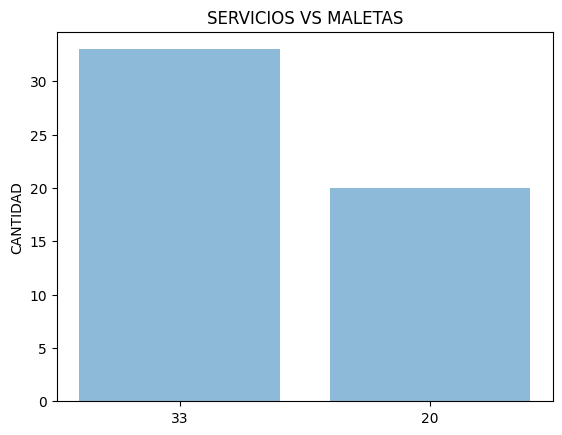

In [89]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = SERVICIO, MALETA
y_pos = np.arange(len(objects))
plt.bar(y_pos, objects, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('CANTIDAD')
plt.title('SERVICIOS VS MALETAS')

plt.show()